## Libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Reading data

In [11]:
data_csv = pd.read_csv('2017.csv')
y = data_csv.iloc[:, 2].values
X = data_csv.iloc[:, 3:].values

## Check how data was read

In [12]:
print(X)

[[7.594444821 7.479555538 1.616463184 ... 0.362012237 0.315963835
  2.277026653]
 [7.581728065 7.462271607 1.482383013 ... 0.355280489 0.400770068
  2.313707352]
 [7.622030473 7.385969901 1.48063302  ... 0.475540221 0.153526559
  2.322715282]
 ...
 [3.461429755 3.236570199 0.511135876 ... 0.354256362 0.066035107
  0.621130466]
 [3.074690333 2.73530961  0.091622569 ... 0.204435185 0.084147945
  1.683024168]
 [2.864884269 2.521115887 0.          ... 0.280876487 0.056565076
  2.066004753]]


## Splitting into Training and Test

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Test results

In [15]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=10)
comparison=np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(comparison)

[[6.5269999505 6.52699995  ]
 [5.181000233  5.181000233 ]
 [3.3489999769 3.348999977 ]
 [4.5529999735 4.552999973 ]
 [6.5780000691 6.578000069 ]
 [7.31400013   7.31400013  ]
 [6.0029997825 6.002999783 ]
 [4.6950001716 4.695000172 ]
 [5.8249998095 5.824999809 ]
 [4.4600000385 4.460000038 ]
 [5.1820001606 5.18200016  ]
 [5.2270002365 5.227000237 ]
 [3.875        3.875       ]
 [5.8379998205 5.837999821 ]
 [4.5739998819 4.573999882 ]
 [6.0869998935 6.086999893 ]
 [6.402999878  6.402999878 ]
 [2.9049999715 2.904999971 ]
 [5.429999828  5.429999828 ]
 [4.1900000571 4.190000057 ]
 [4.961999893  4.961999893 ]
 [7.2839999195 7.28399992  ]
 [3.8080000874 3.808000088 ]
 [3.5910000801 3.59100008  ]
 [6.1680002215 6.168000221 ]
 [4.7750000955 4.775000095 ]
 [3.7660000324 3.766000032 ]
 [5.7579998969 5.757999897 ]
 [5.0409998895 5.040999889 ]
 [4.6919999125 4.691999912 ]
 [6.890999794  6.890999794 ]]


## Plot the loss

In [16]:
def calculate_loss_regression(real,computed,alpha):

    suma=0

    loss_list=[]

    for r,c in zip(real,computed): 

        if abs(r-c)<alpha:
            loss_list.append(abs(r-c)**2)
        else:
            loss_list.append(abs(r-c))

    return loss_list

In [17]:
# print(y_pred)

loss_list=calculate_loss_regression(y_pred.tolist(),y_test.tolist(),100)
error=0
for el in loss_list: 
    error+=el 

print(error/len(loss_list))
# print(y_pred.tolist())
# print(y_test.tolist())
# print(loss_list)

1.4258318554981614e-19


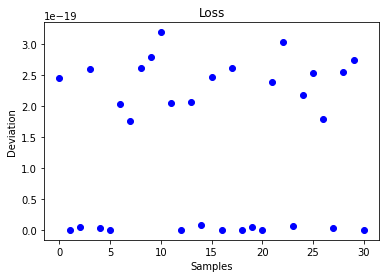

In [18]:
plt.scatter([i for i in range(len(loss_list))], loss_list, color = 'blue')
plt.title('Loss')
plt.xlabel('Samples')
plt.ylabel('Deviation')
plt.show()